In [1]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: E850-3B9A

 C:\Users\user\Documents\Microsoft-AI-School\22.11.30_d41_statistics 디렉터리

2022-11-30  오후 03:45    <DIR>          .
2022-11-30  오후 03:45    <DIR>          ..
2022-11-30  오후 03:21    <DIR>          .ipynb_checkpoints
2022-11-30  오후 03:24           154,617 1_logistic_regression.ipynb
2022-11-30  오후 03:41           539,865 2_nlp.ipynb
2022-11-30  오후 03:44            72,903 3_practice.ipynb
2022-11-29  오전 11:54                82 README.md
2022-11-30  오후 01:22        20,163,021 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv
               5개 파일          20,930,488 바이트
               3개 디렉터리  403,940,560,896 바이트 남음


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
metro_all = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='cp949')

In [4]:
metro_all = metro_all.drop(columns = ['작업일자'])

In [5]:
metro_all.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202210,1호선,동대문,729,6,11017,1926,9398,6871,14707,...,5076,8316,440,2216,1,191,0,0,0,0
1,202210,1호선,동묘앞,196,3,3113,1192,3766,4838,6384,...,1386,3913,92,1782,1,306,0,0,0,0
2,202210,1호선,서울역,707,34,9180,9659,13511,55432,40840,...,26783,14843,2421,2533,2,172,0,0,0,0
3,202210,1호선,시청,112,0,2364,5063,3908,26854,7253,...,10639,3367,405,797,1,16,0,0,0,0
4,202210,1호선,신설동,334,13,9503,2222,9536,8484,20433,...,3669,8583,336,2113,3,5,0,2,0,0


In [6]:
metro_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55113 entries, 0 to 55112
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           55113 non-null  int64 
 1   호선명           55113 non-null  object
 2   지하철역          55113 non-null  object
 3   04시-05시 승차인원  55113 non-null  int64 
 4   04시-05시 하차인원  55113 non-null  int64 
 5   05시-06시 승차인원  55113 non-null  int64 
 6   05시-06시 하차인원  55113 non-null  int64 
 7   06시-07시 승차인원  55113 non-null  int64 
 8   06시-07시 하차인원  55113 non-null  int64 
 9   07시-08시 승차인원  55113 non-null  int64 
 10  07시-08시 하차인원  55113 non-null  int64 
 11  08시-09시 승차인원  55113 non-null  int64 
 12  08시-09시 하차인원  55113 non-null  int64 
 13  09시-10시 승차인원  55113 non-null  int64 
 14  09시-10시 하차인원  55113 non-null  int64 
 15  10시-11시 승차인원  55113 non-null  int64 
 16  10시-11시 하차인원  55113 non-null  int64 
 17  11시-12시 승차인원  55113 non-null  int64 
 18  11시-12시 하차인원  55113 non-null  int64 
 19  12시-

In [7]:
sorted(list(set(metro_all['사용월'])))

[201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106,
 202107,
 202108,
 202109,
 202110,
 202111,
 202112,
 202201,
 202202,
 202203,
 202204,
 202205,
 202206,
 202207,
 202208,
 202209,
 202210]

In [8]:
sorted(list(set(metro_all['지하철역'])))

['4.19민주묘지',
 '가능',
 '가락시장',
 '가산디지털단지',
 '가양',
 '가오리',
 '가좌',
 '가천대',
 '가평',
 '간석',
 '갈매',
 '강남',
 '강남구청',
 '강동',
 '강동구청',
 '강매',
 '강변',
 '강변(동서울터미널)',
 '강일',
 '강촌',
 '개롱',
 '개봉',
 '개포동',
 '개화',
 '개화산',
 '거여',
 '건대입구',
 '검암',
 '경기광주',
 '경마공원',
 '경복궁',
 '경복궁(정부서울청사)',
 '경찰병원',
 '계양',
 '고덕',
 '고려대',
 '고려대(종암)',
 '고색',
 '고속터미널',
 '고잔',
 '곡산',
 '곤지암',
 '공덕',
 '공릉',
 '공릉(서울과학기술대)',
 '공항시장',
 '공항화물청사',
 '과천',
 '관악',
 '관악산(서울대)',
 '광나루',
 '광나루(장신대)',
 '광명',
 '광명사거리',
 '광운대',
 '광화문',
 '광화문(세종문화회관)',
 '광흥창',
 '광흥창(서강)',
 '교대',
 '교대(법원.검찰청)',
 '구로',
 '구로디지털단지',
 '구룡',
 '구리',
 '구반포',
 '구산',
 '구성',
 '구의',
 '구의(광진구청)',
 '구일',
 '구파발',
 '국수',
 '국회의사당',
 '군자',
 '군자(능동)',
 '군포',
 '굴봉산',
 '굴포천',
 '굽은다리',
 '굽은다리(강동구민회관앞)',
 '금곡',
 '금릉',
 '금정',
 '금천구청',
 '금촌',
 '금호',
 '기흥',
 '길동',
 '길음',
 '김유정',
 '김포공항',
 '까치산',
 '까치울',
 '낙성대',
 '낙성대(강감찬)',
 '남구로',
 '남동인더스파크',
 '남부터미널',
 '남부터미널(예술의전당)',
 '남성',
 '남영',
 '남위례',
 '남춘천',
 '남태령',
 '남한산성입구',
 '남한산성입구(성남법원.검찰청)',
 '내방',
 '노들',
 '노량진',
 '노원',
 '녹번',
 '녹사평(용산구청)',

In [9]:
sorted(list(set(metro_all['호선명'])))

['1호선',
 '2호선',
 '3호선',
 '4호선',
 '5호선',
 '6호선',
 '7호선',
 '8호선',
 '9호선',
 '9호선2~3단계',
 '9호선2단계',
 '경강선',
 '경부선',
 '경원선',
 '경의선',
 '경인선',
 '경춘선',
 '공항철도 1호선',
 '과천선',
 '분당선',
 '수인선',
 '신림선',
 '안산선',
 '우이신설선',
 '일산선',
 '장항선',
 '중앙선']

In [10]:
len(set(metro_all['지하철역']))

588

In [11]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [12]:
metro_all.groupby(['호선명']).mean()

,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
호선명,,,,,,,,,,,,,,,,,,,,,
1호선,201848.946809,387.164894,10.758511,6555.472340,3489.656383,7892.974468,16806.124468,17626.506383,43328.771277,26260.322340,...,13739.614894,8651.550000,1275.086170,2631.382979,19.334043,85.343617,0.232979,2.341489,0.019149,0.000000
2호선,201848.946809,266.462979,3.985319,10139.972340,2832.103404,17860.039574,16160.655957,47103.984043,39500.061064,64721.852340,...,18219.347234,21597.647872,2512.643404,6254.999149,16.676809,364.504894,1.898511,6.177447,0.113191,0.673617
3호선,201848.946809,54.647685,2.625782,4237.506884,1106.412078,10055.102941,10216.112954,27285.234355,24142.189925,33677.954944,...,6135.224656,9323.523154,675.792553,2603.294431,4.204631,91.846683,0.122340,1.363267,0.002503,0.002503
4호선,201848.946809,150.464403,5.569558,7887.824877,1424.306465,17849.860884,11218.542553,45418.102291,25057.673895,50582.429214,...,10652.868658,16879.819149,1329.695172,4619.212766,7.074059,174.653437,0.130524,1.957856,0.033961,0.057283
5호선,201855.747148,13.378769,0.296862,4617.309698,976.954971,10555.886512,6857.246740,30835.211084,16556.646088,35557.805623,...,3818.706601,8828.560106,429.723309,2545.563773,3.692543,80.336186,0.024042,1.215159,0.000407,0.000407
6호선,201851.333795,40.607707,0.714167,4205.369559,919.865816,8254.310785,4389.734128,22676.006376,9752.030773,27521.438314,...,4703.131688,8422.234821,616.002218,2426.505406,3.524258,85.286388,0.075132,0.844192,0.000554,0.000000
7호선,201846.690176,41.557095,0.704450,6639.592149,1424.560453,13369.609782,7453.520781,36000.733627,16936.848027,42595.158900,...,5486.802477,11145.883921,765.960957,3504.653023,3.614400,146.091100,0.026868,1.290302,0.001889,0.000210
8호선,201851.326290,11.014295,0.274705,4883.970168,1355.543195,10123.284649,6756.062150,27770.905531,12663.937228,35837.550653,...,3063.798633,8090.702921,429.755127,2252.330640,3.178993,140.191423,0.017402,1.158484,0.009323,0.009323
9호선,201848.946809,17.428085,0.244681,3883.358298,970.531064,8773.421702,6789.002553,24043.149362,17170.793617,26971.609362,...,4753.458298,8496.923404,642.023830,2295.286383,3.100851,89.531489,0.022553,0.471489,0.008511,0.003404


In [13]:
metro_st = metro_all.groupby(['호선명','지하철역']).mean().reset_index()

In [14]:
metro_st = metro_st.drop(columns=['사용월'])

In [15]:
metro_get_on = pd.DataFrame()
metro_get_off = pd.DataFrame()

metro_get_on['지하철역'] = metro_st['지하철역']
metro_get_on['호선명'] = metro_st['호선명']
metro_get_off['지하철역'] = metro_st['지하철역']
metro_get_off['호선명'] = metro_st['호선명']

for column in metro_st.columns:
    if '승차' in column:
        metro_get_on[[column]] = metro_st[[column]]
    elif '하차' in column:
        metro_get_off[[column]] = metro_st[[column]]

metro_get_on = metro_get_on.set_index('지하철역')
metro_get_off = metro_get_off.set_index('지하철역')

metro_get_on



,호선명,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,1호선,610.457447,13841.819149,10665.265957,16918.819149,22716.978723,21713.404255,19770.617021,21286.744681,26098.989362,...,30553.319149,21826.691489,17402.670213,16072.914894,13629.819149,6941.680851,727.180851,8.595745,0.159574,0.000000
동묘앞,1호선,116.382979,3077.138298,3557.000000,6560.255319,9132.893617,8528.925532,9742.712766,14141.063830,19588.776596,...,27067.234043,13584.170213,7648.446809,6437.925532,4402.042553,1967.074468,197.319149,2.287234,0.159574,0.159574
서울역,1호선,932.287234,10782.361702,13703.489362,40358.680851,73112.468085,59053.287234,60859.989362,76296.893617,87111.021277,...,214323.734043,122073.063830,86167.223404,89882.946809,65604.031915,29311.574468,3402.042553,39.851064,0.202128,0.010638
시청,1호선,64.180851,2206.393617,3465.095745,7061.712766,9202.180851,11319.946809,14113.244681,19761.329787,22109.595745,...,140159.287234,67399.127660,53302.510638,53652.457447,35340.382979,12421.914894,848.936170,16.914894,0.180851,0.000000
신설동,1호선,274.382979,8481.329787,9649.244681,20108.989362,27721.382979,20431.446809,18732.212766,21492.734043,23130.776596,...,61794.936170,28674.148936,18188.670213,16580.170213,12146.861702,4878.946809,398.265957,2.606383,0.095745,0.010638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
원덕,중앙선,36.404255,320.648936,576.734043,952.361702,1098.691489,1018.446809,970.893617,715.436170,694.957447,...,691.287234,408.074468,219.531915,122.510638,56.819149,23.212766,4.659574,0.042553,0.000000,0.000000
중랑,중앙선,103.861702,5895.457447,9771.574468,23605.340426,23360.106383,14136.563830,10294.457447,9025.287234,9171.053191,...,8087.755319,5603.372340,3985.702128,3489.255319,2526.744681,1187.117021,74.574468,0.021277,0.000000,0.000000
지평,중앙선,0.514286,0.285714,29.771429,291.614286,222.442857,3.800000,289.000000,1.214286,1.542857,...,38.385714,141.542857,11.142857,8.471429,3.485714,0.014286,0.000000,0.000000,0.000000,0.000000


In [16]:
df = pd.DataFrame(index=metro_st['지하철역'])
df['호선명'] = metro_get_on['호선명']
df['평균승차인원수'] = metro_get_on[metro_get_on.columns.difference(['호선명'])].mean(axis=1)
df['평균하차인원수'] = metro_get_off[metro_get_off.columns.difference(['호선명'])].mean(axis=1)
df['평균승하차인원수'] = df[['평균승차인원수','평균하차인원수']].sum(axis=1)
df.loc['서울역']

,호선명,평균승차인원수,평균하차인원수,평균승하차인원수
지하철역,,,,
서울역,1호선,64239.761525,59827.354610,124067.116135
서울역,4호선,14092.005762,23938.179965,38030.185727
서울역,경부선,5452.975621,1266.652482,6719.628103
서울역,경의선,2775.750940,3376.494674,6152.245614
서울역,공항철도 1호선,12911.730940,11228.834220,24140.565160


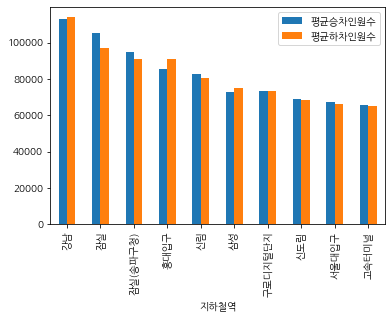

In [17]:
df.sort_values('평균승하차인원수', ascending=False)[['평균승차인원수','평균하차인원수']].head(10).plot(kind=('bar'))
plt.show()

In [20]:
!pip install geopy

In [21]:
# !pip install geopy
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent='South Korea',  timeout=None)
    geo = geolocoder.geocode(address)
    if geo == None:
        return None
    crd = [str(geo.latitude), str(geo.longitude)]
    return crd

geocoding('구로구청역')

In [22]:
!pip install folium

In [23]:
import folium

In [24]:
metro_line = df[df['호선명']=='1호선']
for i, row in enumerate(metro_line.values):
    name = metro_line.iloc[i].name
    line, avg_on, avg_off, avg_all = row
    
    if '(' in name:
        name = name.split('(')[0]
    if '역' in name:
        crd = geocoding(name)
    else:
        crd = geocoding(name+'역')
        
    if crd == None:
        print(f'Can not find crd {name}')
        continue
        
    if i == 0:
        map_ = folium.Map(location=crd, zoom_start=12)
        # print(name, ':', avg_all/metro_line['평균승하차인원수'].mean()+2)
    try:
        marker = folium.CircleMarker(
            crd,
            radius=avg_all/metro_line['평균승하차인원수'].mean()+10,
            color='red',
            fill_color='red'
        )
    except Exception as e:
        print(e)
    marker.add_to(map_)
    
map_

In [25]:
metro_all[metro_all['지하철역']=='노량진']['호선명'].unique()

array(['9호선', '경부선'], dtype=object)